In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [58]:
daten = pd.read_csv("/home/martin/Documents/Radiochromer_Film/EBT_CAL",header=None,sep=" ").as_matrix()
origin_x = daten[0][0]
origin_y = daten[0][1]
x_axis = daten[2][0]
y_axis = daten[1][1]

x_origin = 0.01
x_end = 10

y_origin = 0
y_end = 6E4

delta_x = abs(x_axis - origin_x)
delta_y = abs(y_axis - origin_y)


daten[3:] = [i-daten[0] for i in daten[3:]]
daten[3:] = abs(daten[3:])

x_funct = lambda x: x_origin*10**((x/delta_x)*math.log10(x_end/x_origin))
x_funct = np.vectorize(x_funct)

xvals_corrected = x_funct(daten[3:,0])

y_funct = lambda y: (y/delta_y)*y_end
y_funct = np.vectorize(y_funct)

yvals_corrected = y_funct(daten[3:,1])



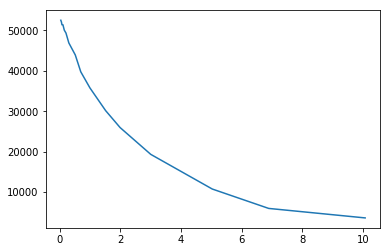

In [55]:
plt.clf()
plt.plot(xvals_corrected,yvals_corrected)
plt.show()

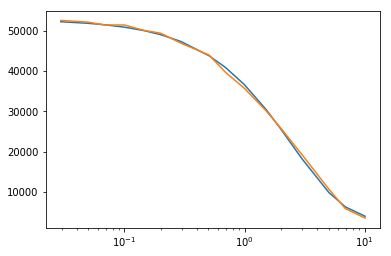

In [56]:
from scipy.optimize import curve_fit

def func(x, a, b, c):
     return a * np.exp(-b * x) + c


popt, pcov = curve_fit(func, xvals_corrected, yvals_corrected/10000)
plt.plot(xvals_corrected, 10000*func(xvals_corrected, *popt))
plt.plot(xvals_corrected, yvals_corrected)
plt.xscale("log")
plt.show()

In [81]:
#Checking scaling behavior
import math

x_1 = 2
y_1 = 2
x_2 = 4
y_2 = 8

y_1_corr = math.log(y_1)
y_2_corr = math.log(y_2)

a = (y_2_corr-y_1_corr)/(x_2-x_1)
b = y_1_corr - a* x_1

print("a: {}, b: {}".format(a,b))

f = lambda x: math.exp(a*x+b)

f()

a: 0.6931471805599452, b: -0.6931471805599451


31.99999999999997